# **Importación de Librerías**

In [1]:
import mlflow
import time
import torch
torch.manual_seed(13)
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision import transforms

In [2]:
%load_ext autoreload
%autoreload 2

import utils.mlflow_logs as mlflow_logs

from utils.early_stopping import EarlyStopping
from utils.metrics_plots import *
from utils.train import *

In [3]:
# Autoencoders
from models.autoencoders.ConvAutoencoder2Layers_v1 import ConvAutoencoder2Layers_v1
from models.autoencoders.ConvAutoencoder2Layers_v3 import ConvAutoencoder2Layers_v3
from models.autoencoders.ConvAutoencoder3Layers_v3 import ConvAutoencoder3Layers_v3

In [4]:
HOST = "127.0.0.1"
PORT = 8080
TRACKING_SERVER_URI = f"http://{HOST}:{PORT}"
mlflow.set_tracking_uri(TRACKING_SERVER_URI)

EXPERIMENT_DESCRIPPTION = (
    "Convolutional Autoencoder with PyTorch and MNIST dataset"
)

EXPERIMENT_TAGS = {
    "project_name": "NeuralNetworks_FAMAF_2024",
    "architecture": "ConvolutionalAutoencoder",
    "author": "bbas",
    "mlflow.note.content": EXPERIMENT_DESCRIPPTION
}

try:
    mlflow.create_experiment(name="ConvAutoencoder-FashionMNIST", tags=EXPERIMENT_TAGS)
except mlflow.exceptions.RestException as e:
    print(e)
mlflow.set_experiment("ConvAutoencoder-FashionMNIST")

RESOURCE_ALREADY_EXISTS: Experiment 'ConvAutoencoder-FashionMNIST' already exists.


<Experiment: artifact_location='mlflow-artifacts:/850977737315609740', creation_time=1733164370926, experiment_id='850977737315609740', last_update_time=1733164370926, lifecycle_stage='active', name='ConvAutoencoder-FashionMNIST', tags={'architecture': 'ConvolutionalAutoencoder',
 'author': 'bbas',
 'mlflow.note.content': 'Convolutional Autoencoder with PyTorch and MNIST '
                        'dataset',
 'project_name': 'NeuralNetworks_FAMAF_2024'}>

# **Carga de Datos**

In [5]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

train_set_orig = datasets.FashionMNIST('MNIST_data/', download=True, train=True , transform=transform)
valid_set_orig = datasets.FashionMNIST('MNIST_data/', download=True, train=False, transform=transform)

In [6]:
transform = transforms.Compose([
    transforms.Pad(2, padding_mode='constant', fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_set_padded = datasets.FashionMNIST('MNIST_data_padded/', download=True, train=True , transform=transform)
valid_set_padded = datasets.FashionMNIST('MNIST_data_padded/', download=True, train=False, transform=transform)

# **CustomDataset**

In [7]:
class CustomDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        input = output = self.dataset[idx][0]
        return input, output

# **2) Entrenando el autoencoder**

In [8]:
AUTOENCODERS = [
    ConvAutoencoder2Layers_v1,
    ConvAutoencoder2Layers_v3,
    ConvAutoencoder3Layers_v3,
]

In [9]:
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# print(f"device: {device}")

# batch_size = 128
# train_loader_orig = DataLoader(
#     CustomDataset(train_set_orig), batch_size=batch_size, shuffle=True, num_workers=4
# )
# valid_loader_orig = DataLoader(
#     CustomDataset(valid_set_orig), batch_size=batch_size, shuffle=False, num_workers=4
# )

# train_loader_padded = DataLoader(
#     CustomDataset(train_set_padded), batch_size=batch_size, shuffle=True, num_workers=4
# )
# valid_loader_padded = DataLoader(
#     CustomDataset(valid_set_padded), batch_size=batch_size, shuffle=False, num_workers=4
# )

# loss_fn = nn.MSELoss()
# epochs = 100
# lr = 1e-3
# dropout = 0.2
# n = 256
# add_linear = False

# extra_hyperparms = {
#     "n": n,
#     "dropout": dropout,
#     "add_linear": add_linear
# }

In [10]:
# for Autoencoder in [ConvAutoencoder3Layers_v3]:
#     torch.cuda.empty_cache()
#     arch_name = Autoencoder.__name__
#     print(f"Training {arch_name} with dropout={dropout} and add_linear={add_linear}")
    
#     if "LeNet" in arch_name:
#         train_loader = train_loader_padded
#         valid_loader = valid_loader_padded
#         model = Autoencoder().to(device)
#     else:
#         train_loader = train_loader_orig
#         valid_loader = valid_loader_orig
#         model = Autoencoder(add_linear, n, dropout).to(device)

#     optimizer = optim.Adam(model.parameters(), lr=lr)

#     timestamp = time.strftime("%Y%m%d-%H%M%S")
#     with mlflow.start_run(run_name=f"run_{timestamp}"):
#         mlflow.log_param("model_name", arch_name)
#         mlflow_logs.log_model_architecture(model)
#         early_stopper = EarlyStopping(delta=0.0001, patience=10)
#         mlflow_logs.log_hyperparams(
#             epochs, batch_size, optimizer, loss_fn, early_stopper, **extra_hyperparms
#         )

#         results = train_validate_loop(
#             model, train_loader, valid_loader, loss_fn, optimizer, epochs, early_stopper
#         )
        
#         losses_plot(
#             results['avg_losses_training'],
#             results['train_avg_losses'],
#             results['valid_avg_losses'],
#             show=False
#         )
#         plot_orig_predicted(
#             model, valid_set_orig, num_samples=3, show=False
#         )
#         mlflow.pytorch.log_model(results['model'], "model")
#         mlflow.end_run()

# **Hiperparámetros de la Arquitectura elegida**

In [11]:
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# print(f"device: {device}")

# add_linear = False
# n = 0

# epochs = 100
# loss_fn = nn.MSELoss()

# hyperparams = [
#     {"optim": optim.Adam, "lr": 1e-4, "dropout": 0.4, "batch_size": 128},
#     {"optim": optim.Adam, "lr": 1e-3, "dropout": 0.4, "batch_size": 256},
#     {"optim": optim.SGD, "lr": 1e-3, "dropout": 0.2, "batch_size": 256},
#     {"optim": optim.RMSprop, "lr": 1e-3, "dropout": 0.4, "batch_size": 128},
# ]

In [12]:
# for params in hyperparams:
#     print(params)
    
#     optim_name = params["optim"]
#     lr = params["lr"]
#     dropout = params["dropout"]
#     batch_size = params["batch_size"]

#     torch.cuda.empty_cache()

#     train_loader = DataLoader(
#         CustomDataset(train_set_orig), batch_size=batch_size, shuffle=True, num_workers=4
#     )
#     valid_loader = DataLoader(
#         CustomDataset(valid_set_orig), batch_size=batch_size, shuffle=False, num_workers=4
#     )

#     model = ConvAutoencoder2Layers_v3(False, 0, dropout).to(device)
#     optimizer = optim_name(model.parameters(), lr=lr)

#     timestamp = time.strftime("%Y%m%d-%H%M%S")
#     with mlflow.start_run(run_name=f"run_{timestamp}"):
#         mlflow.log_param("model_name", model.__class__.__name__)
#         mlflow_logs.log_model_architecture(model)
#         early_stopper = EarlyStopping(delta=0.0001, patience=10)
#         mlflow_logs.log_hyperparams(
#             epochs, batch_size, optimizer, loss_fn, early_stopper, add_linear=add_linear, n=n, dropout=dropout
#         )

#         results = train_validate_loop(
#             model, train_loader, valid_loader, loss_fn, optimizer, epochs, early_stopper
#         )
        
#         losses_plot(
#             results['avg_losses_training'],
#             results['train_avg_losses'],
#             results['valid_avg_losses'],
#             show=False
#         )
#         plot_orig_predicted(
#             model, valid_set_orig, num_samples=3, show=False
#         )
#         mlflow.pytorch.log_model(results['model'], "model")
#         mlflow.end_run()

# **3) Definiendo y entrenando un clasificador convolucional reutilizando el encoder**

1. Defina y cree un clasificador convolucional, agregando una capa clasificadora al encoder del
autoencoder previamente entrenado.
2. Reimplemente las funciones de entrenamiento, teniendo en cuenta que ahora debe incluir el cálculo
de precisiones.
3. Cree una función de pérdida usando la Cross Entropy Loss (CEL).
4. Cree una instancia del modelo clasificador.
5. Entrene y valide el modelo.
6. Grafique los distintos valores de la CEL y la precisión calculados, en función de las  ́epocas de
entrenamiento.
7. Utilice el conjunto de validación para calcular una Matriz de confusión. Grafíquela y comente los
resultados.

In [9]:
from models.classifiers.ConvClassifier_v1 import ConvClassifier_v1

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"device: {device}")

loss_fn = nn.CrossEntropyLoss()
n1 = 128
n2 = 64
p = 0.2
epochs = 100
lr = 1e-3

batch_size = 128
train_loader = DataLoader(
    train_set_orig, batch_size=batch_size, shuffle=True, num_workers=4
)
valid_loader = DataLoader(
    valid_set_orig, batch_size=batch_size, shuffle=False, num_workers=4
)

device: cuda


In [11]:
model = ConvClassifier_v1(p, n1, n2, encoder=None).to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)

torch.cuda.empty_cache()

timestamp = time.strftime("%Y%m%d-%H%M%S")
with mlflow.start_run(run_name=f"run_{timestamp}"):
    mlflow.log_param("model_name", model.__class__.__name__)
    mlflow_logs.log_model_architecture(model)
    early_stopper = EarlyStopping(delta=0.0001, patience=10)
    mlflow_logs.log_hyperparams(
        epochs, batch_size, optimizer, loss_fn, early_stopper, n1=n1, n2=n2, dropout=p
    )

    results = train_validate_loop(
        model, train_loader, valid_loader, loss_fn, optimizer, epochs, early_stopper
    )
    
    losses_plot(
        results['avg_losses_training'],
        results['train_avg_losses'],
        results['valid_avg_losses'],
        show=False
    )
    accs_plot(
        results['accs_training'],
        results['train_accs'],
        results['valid_accs'],
        show=False
    )
    mlflow.pytorch.log_model(results['model'], "model")
    mlflow.end_run()

Creating new encoder!


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0
Batch 0 of 469. Loss in batch: 2.3177
Accuracy in batch: 0.0391
Batch 100 of 469. Loss in batch: 0.7512
Accuracy in batch: 0.6797
Batch 200 of 469. Loss in batch: 0.4415
Accuracy in batch: 0.8672
Batch 300 of 469. Loss in batch: 0.4908
Accuracy in batch: 0.8281
Batch 400 of 469. Loss in batch: 0.5505
Accuracy in batch: 0.7812
Train avg loss: 0.407621 | Valid avg loss: 0.423736
Train accuracy: 0.864600 | Valid accuracy: 0.854200
----------------------------------------------------------------
Epoch 1
Batch 0 of 469. Loss in batch: 0.4657
Accuracy in batch: 0.8359
Batch 100 of 469. Loss in batch: 0.4379
Accuracy in batch: 0.8203
Batch 200 of 469. Loss in batch: 0.4445
Accuracy in batch: 0.8359
Batch 300 of 469. Loss in batch: 0.4386
Accuracy in batch: 0.8281
Batch 400 of 469. Loss in batch: 0.2816
Accuracy in batch: 0.8750
Train avg loss: 0.336440 | Valid avg loss: 0.359064
Train accuracy: 0.886833 | Valid accuracy: 0.873700
-------------------------------------------------------

2024/12/18 18:49:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run run_20241218-184410 at: http://127.0.0.1:8080/#/experiments/850977737315609740/runs/64c8df37a2034685aecde5688e909797
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/850977737315609740


In [16]:
# trained_autoencoder_uri = 'runs:/139a25e559774eef888bc0f65677bac4/model'
# trained_autoencoder = mlflow.pytorch.load_model(trained_autoencoder_uri)

In [17]:
# model = ConvClassifier_v1(p, n1, n2, encoder=trained_autoencoder.encoder).to(device)
# optimizer = optim.Adam(model.classifier.parameters(), lr=lr)

# torch.cuda.empty_cache()

# timestamp = time.strftime("%Y%m%d-%H%M%S")
# with mlflow.start_run(run_name=f"run_{timestamp}"):
#     mlflow.log_param("model_name", model.__class__.__name__)
#     mlflow_logs.log_model_architecture(model)
#     early_stopper = EarlyStopping(delta=0.0001, patience=10)
#     mlflow_logs.log_hyperparams(
#         epochs, batch_size, optimizer, loss_fn, early_stopper, n1=n1, n2=n2, dropout=p
#     )

#     results = train_validate_loop(
#         model, train_loader, valid_loader, loss_fn, optimizer, epochs, early_stopper
#     )
    
#     losses_plot(
#         results['avg_losses_training'],
#         results['train_avg_losses'],
#         results['valid_avg_losses'],
#         show=False
#     )
#     accs_plot(
#         results['accs_training'],
#         results['train_accs'],
#         results['valid_accs'],
#         show=False
#     )
#     mlflow.pytorch.log_model(results['model'], "model")
#     mlflow.end_run()

# **4) Prentrenamiento**
Modifique el optimizador para que solo reentrene los parámetros de la capa clasificadora, dejando los parámetros de la capa codificadora tal como vienen entrenada del autoencoder convolucional. Repita los experimentos de la parte 3. Qué observa? Comente

Ayuda: Se recomienda guardar en archivos los pesos de las distintas capas de las redes entrenadas para que puedan ser reutilizadas.

In [18]:
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# print(f"device: {device}")

# loss_fn = nn.CrossEntropyLoss()
# epochs = 100

# hyperparams = [
#     {"n1": 128, "n2": 64 , "batch_size": 128, "optim": optim.Adam, "lr": 1e-4, "dropout": 0.3},
#     {"n1": 128, "n2": 128, "batch_size": 256, "optim": optim.Adam, "lr": 1e-4, "dropout": 0.3},
#     {"n1": 256, "n2": 128, "batch_size": 128, "optim": optim.RMSprop, "lr": 1e-3, "dropout": 0.2},
# ]

In [19]:
# for params in hyperparams:
#     n1 = params["n1"]
#     n2 = params["n2"]
#     batch_size = params["batch_size"]
#     optim_name = params["optim"]
#     lr = params["lr"]
#     p = params["dropout"]

#     torch.cuda.empty_cache()
    
#     train_loader = DataLoader(
#         train_set_orig, batch_size=batch_size, shuffle=True, num_workers=4
#     )
#     valid_loader = DataLoader(
#         valid_set_orig, batch_size=batch_size, shuffle=False, num_workers=4
#     )

#     model = ConvClassifier_v1(p, n1, n2, encoder=None).to(device)
#     optimizer = optim_name(model.parameters(), lr=lr)

#     timestamp = time.strftime("%Y%m%d-%H%M%S")
#     with mlflow.start_run(run_name=f"run_{timestamp}"):
#         mlflow.log_param("model_name", model.__class__.__name__)
#         mlflow_logs.log_model_architecture(model)
#         early_stopper = EarlyStopping(delta=0.0001, patience=10)
#         mlflow_logs.log_hyperparams(
#             epochs, batch_size, optimizer, loss_fn, early_stopper, n1=n1, n2=n2, dropout=p
#         )

#         results = train_validate_loop(
#             model, train_loader, valid_loader, loss_fn, optimizer, epochs, early_stopper
#         )
        
#         losses_plot(
#             results['avg_losses_training'],
#             results['train_avg_losses'],
#             results['valid_avg_losses'],
#             show=False
#         )
#         accs_plot(
#             results['accs_training'],
#             results['train_accs'],
#             results['valid_accs'],
#             show=False
#         )
#         mlflow.pytorch.log_model(results['model'], "model")
#         mlflow.end_run()

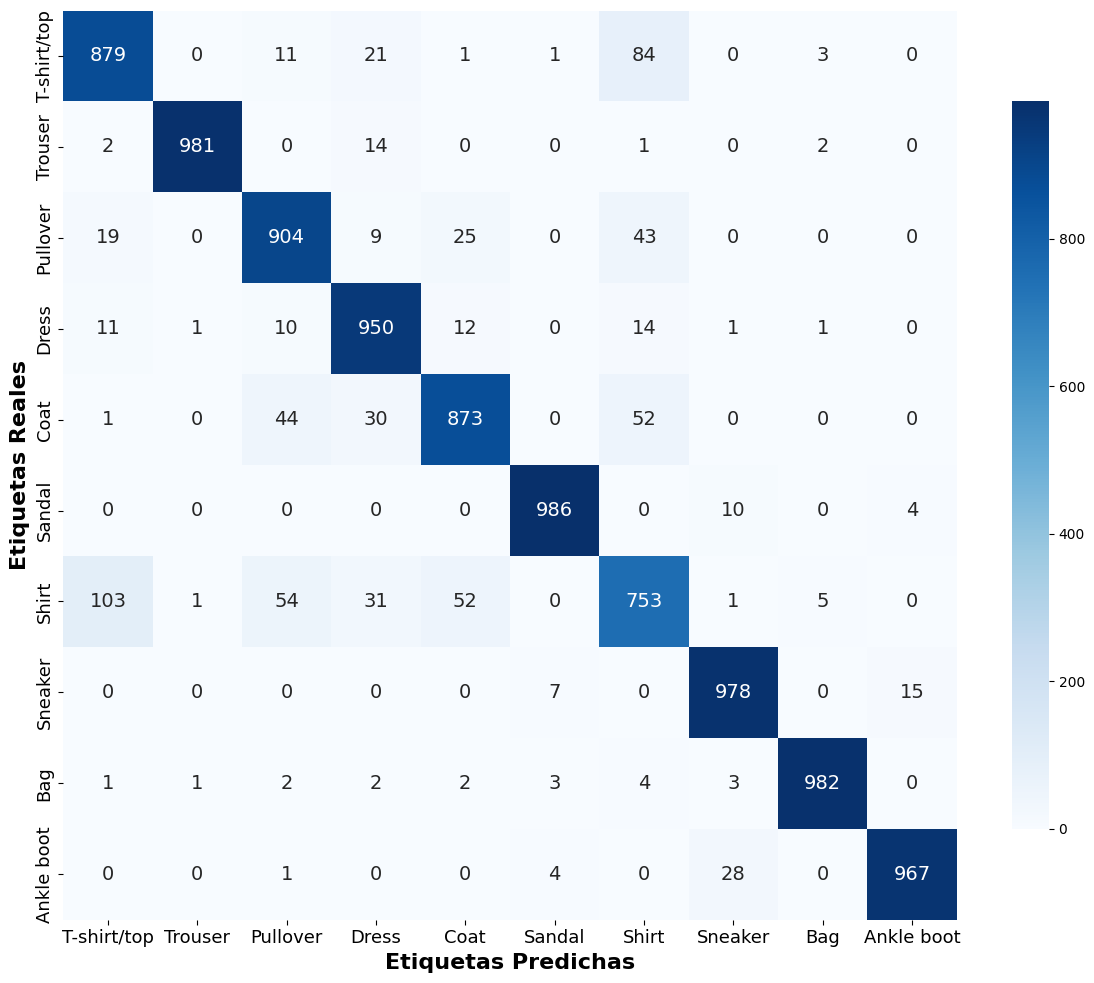

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'

best_classifier_uri = 'runs:/4b5691aa961842349a99b76a710d455b/model'
best_classifier = mlflow.pytorch.load_model(best_classifier_uri).to(device)

valid_loader = DataLoader(
    valid_set_orig, batch_size=128, shuffle=False, num_workers=4
)

# Generate predictions
y_true, y_pred = [], []

best_classifier.eval()
with torch.no_grad():
    for images, labels in valid_loader:
        images, labels = images.to(device), labels.to(device)
        
        outputs = best_classifier(images)
        _, predicted = torch.max(outputs, 1)
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Compute the Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the Confusion Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    cm, 
    annot=True, 
    fmt="d", 
    cmap="Blues", 
    xticklabels=valid_set_orig.classes, 
    yticklabels=valid_set_orig.classes, 
    annot_kws={"size": 14},  # Adjust annotation size
    cbar_kws={"shrink": 0.8}  # Adjust the color bar size
)
plt.xlabel("Etiquetas Predichas", {"fontsize": 16, "fontweight": "bold"})
plt.ylabel("Etiquetas Reales", {"fontsize": 16, "fontweight": "bold"})
plt.xticks(fontsize=13)  # Adjust x-axis tick size
plt.yticks(fontsize=13)  # Adjust y-axis tick size
plt.tight_layout()
plt.show()


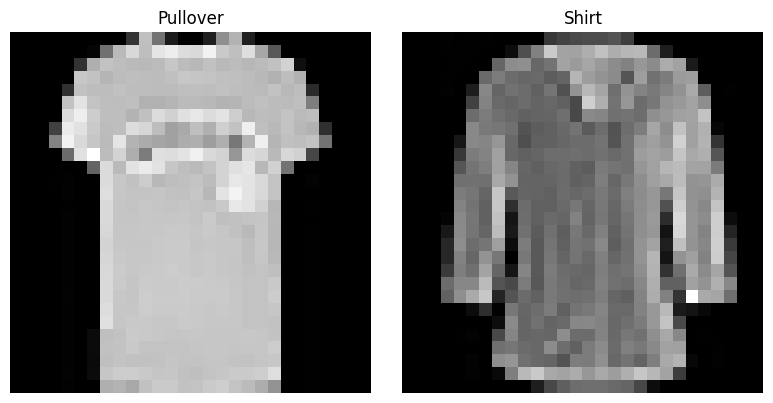

In [32]:
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms

# Load the Fashion MNIST dataset
# Function to find the first example of a specific class
def find_example(dataset, label):
    for image, target in dataset:
        if target == label:
            return image, target

# Find examples of Shirt (label 6) and T-shirt/top (label 0)
shirt_image, _ = find_example(valid_set_orig, 6)
tshirt_image, _ = find_example(valid_set_orig, 0)

# Plot the images
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(tshirt_image.squeeze(), cmap='gray')
axes[0].set_title('Pullover')
axes[0].axis('off')

axes[1].imshow(shirt_image.squeeze(), cmap='gray')
axes[1].set_title('Shirt')
axes[1].axis('off')

plt.tight_layout()
plt.show()
